In [1]:
import numpy as np
import scipy as sp
import distances
import gr_kmeans
import gr_lbg
from kmeans import kmeans
from lbg import lbg
import matplotlib.pyplot as plt
import plots
from mpl_toolkits import mplot3d
from load_ip_data import load_ip_data
from subspaces import make_subspaces

In [2]:
data, labels = load_ip_data([10, 11, 12], sample_size = 10000)

Class 10 name: Soybean-notill
Sample number for class 10 reduced to 972
Class 11 name: Soybean-mintill
Sample number for class 11 reduced to 2455
Class 12 name: Soybean-clean
Sample number for class 12 reduced to 593


# Euclidean Methods

In [3]:
D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(data.T))
embed = distances.mds(D)

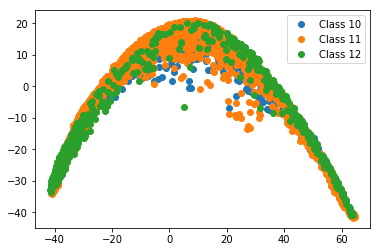

In [4]:
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx, 0], embed[idx, 1], 'o', label='Class %i' % i)
plt.legend()
plt.show()

#### 3 centers

Kmeans terminated after 10 iterations 

Final cluster distortion: 8017935.2527


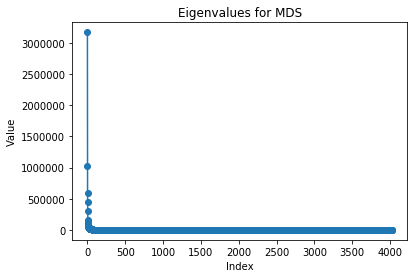

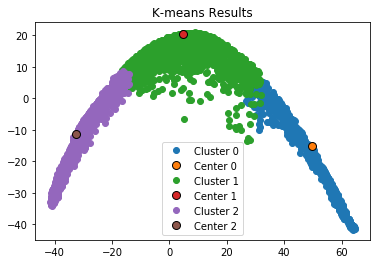

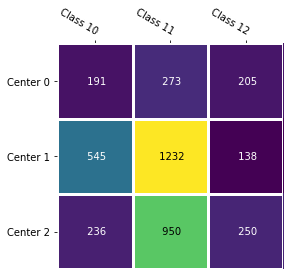

Cluster purity calculations:
Average cluster purity: 0.5710 +/- 0.0133 
Classification accuracy based on highest probability labels:
Accuracy: 0.6107
Classification BSR based on highest probability labels:
BSR: 0.5710


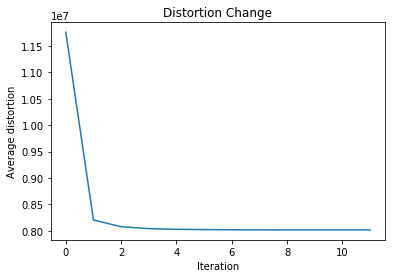

In [5]:
k = kmeans(verbosity=0)
kmeans_centers, kmeans_labels = k.fit(data, true_labels=labels, center_count=3, plot_results=True, eigplot=True,
                                          show_cluster_data=True, numits=100)

LBG terminated after 30 iterations 

Final cluster distortion: 8064659.5053


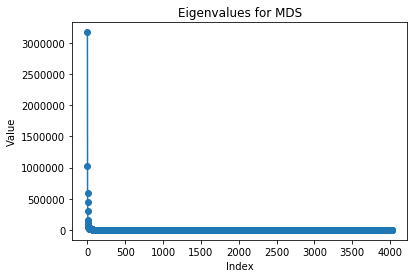

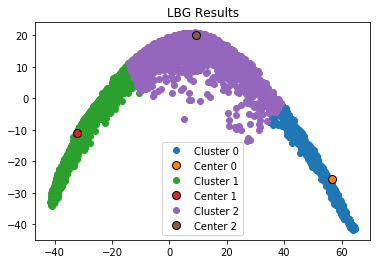

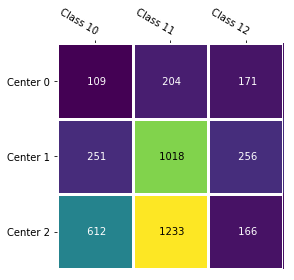

Cluster purity calculations:
Average cluster purity: 0.5674 +/- 0.0111 
Classification accuracy based on highest probability labels:
Accuracy: 0.6107
Classification BSR based on highest probability labels:
BSR: 0.5674


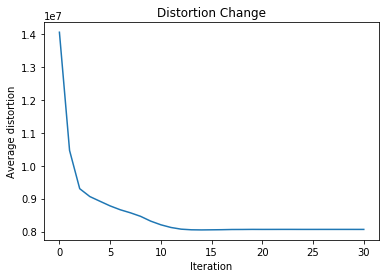

In [6]:
l = lbg(verbosity=0)
lbg_centers, lbg_labels = l.fit(data, true_labels=labels, center_count=3, plot_results=True, eigplot=True,
                                 show_cluster_data=True, numits=100)

# Grassmannian Methods

### Gr(5, 200)

In [7]:
sub, lbls = make_subspaces(data, labels, dim=5)

In [8]:
dist_metric = 'angle'
D = distances.prin_angle_distance(sub, sub)
embed = distances.mds(D)

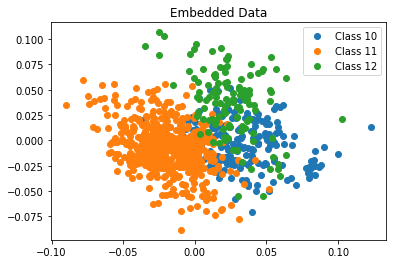

In [9]:
plt.figure()
for i in np.unique(lbls):
    idx = np.where(lbls == i)[0]
    plt.plot(embed[idx, 0], embed[idx, 1], 'o', label='Class %i' % i)
plt.legend()
plt.title('Embedded Data')
plt.show()

### Cluster on embedded data

Kmeans terminated after 100 iterations 

Final cluster distortion: 90.8450


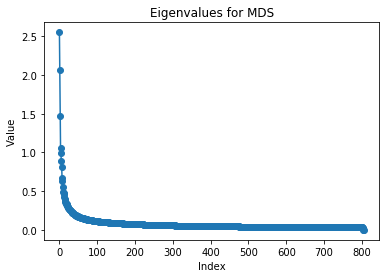

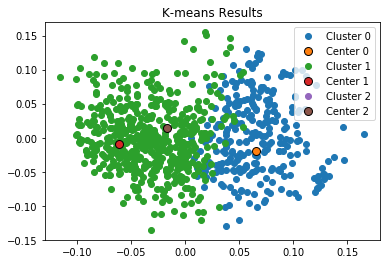

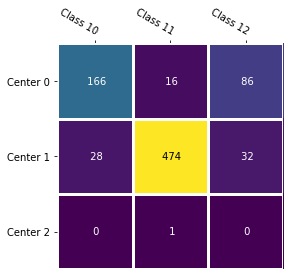

Cluster purity calculations:
Average cluster purity: 0.8357 +/- 0.0255 
Classification accuracy based on highest probability labels:
Accuracy: 0.7983
Classification BSR based on highest probability labels:
BSR: 0.8357


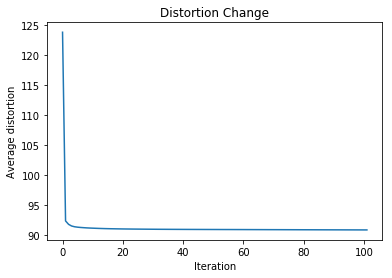

In [10]:
k = kmeans(verbosity=0)
kmeans_centers, kmeans_labels = k.fit(embed.T, true_labels=lbls, center_count=3, plot_results=True, eigplot=True,
                                          show_cluster_data=True, numits=100)

LBG terminated after 12 iterations 

Final cluster distortion: 89.3704


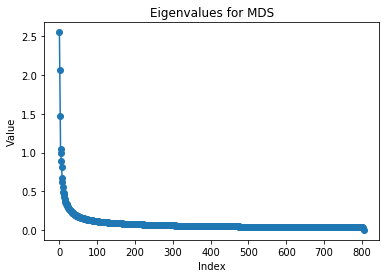

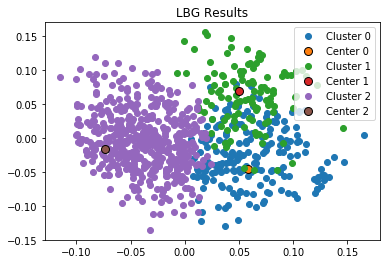

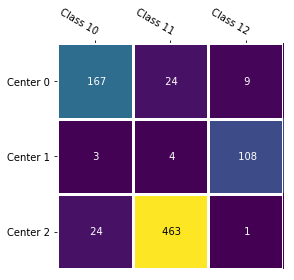

Cluster purity calculations:
Average cluster purity: 0.9076 +/- 0.0027 
Classification accuracy based on highest probability labels:
Accuracy: 0.9191
Classification BSR based on highest probability labels:
BSR: 0.9076


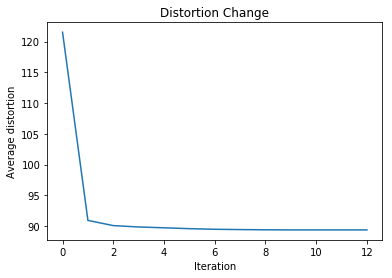

In [11]:
l = lbg(verbosity=0)
lbg_centers, lbg_labels = l.fit(embed.T, true_labels=lbls, center_count=3, plot_results=True, eigplot=True,
                                 show_cluster_data=True, numits=100)

##### 3 centers

Kmeans terminated after 100 iterations 

Final cluster distortion: 5.3685


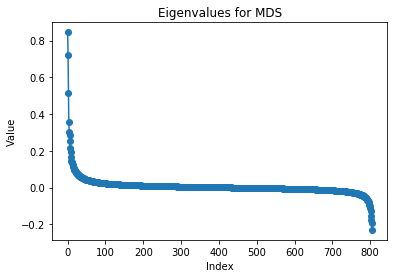

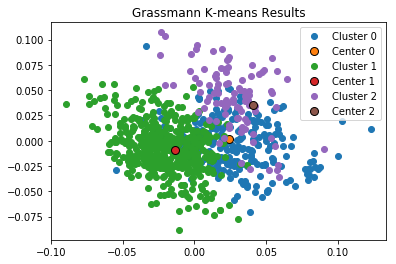

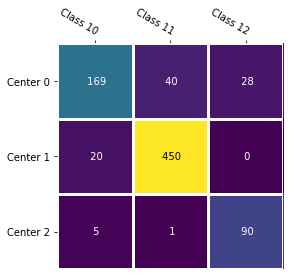

Cluster purity calculations:
Average cluster purity: 0.8693 +/- 0.0123 
Classification accuracy based on highest probability labels:
Accuracy: 0.8829
Classification BSR based on highest probability labels:
BSR: 0.8693


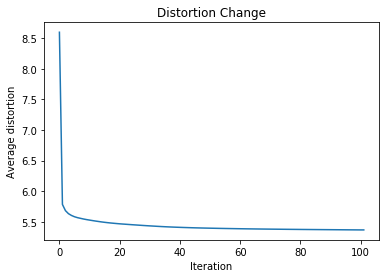

In [12]:
kmeans = gr_kmeans.gr_kmeans(verbosity=0)
kmeans_centers, kmeans_labels = kmeans.fit(sub, true_labels=lbls, center_count=3, plot_results=True, 
                                           show_cluster_data=True, numits=100, dist_metric=dist_metric)

LBG terminated after 100 iterations 

Final cluster distortion: 5.1964


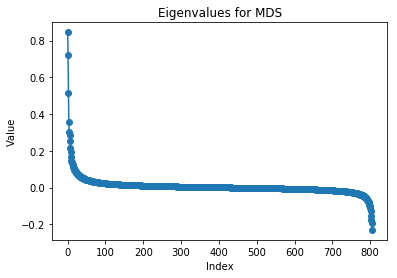

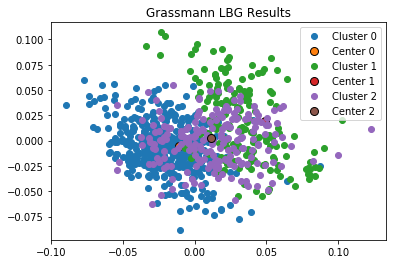

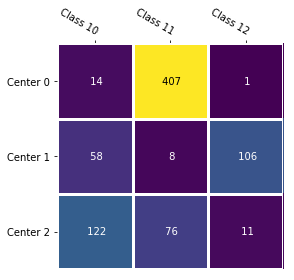

Cluster purity calculations:
Average cluster purity: 0.7215 +/- 0.0297 
Classification accuracy based on highest probability labels:
Accuracy: 0.7908
Classification BSR based on highest probability labels:
BSR: 0.7215


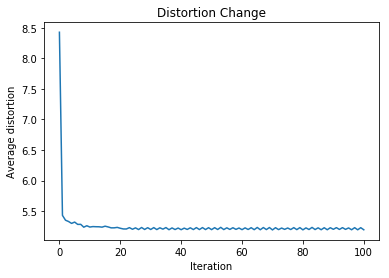

In [13]:
lbg = gr_lbg.gr_lbg(verbosity=0)
lbg_centers, lbg_labels = lbg.fit(sub, true_labels=lbls, show_cluster_data=True, center_count=3, plot_results=True, numits=100, 
                                  dist_metric=dist_metric)

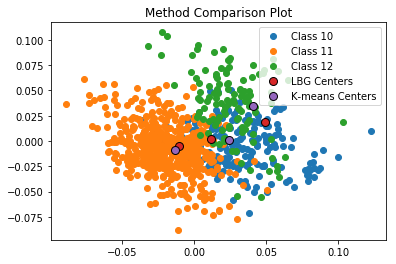

In [14]:
plots.method_comparison_plot(sub, lbls, kmeans_centers, lbg_centers, dist_metric=dist_metric)